In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset = "/Users/manenti_paolo/Desktop/MSc/AY #2/Econometrics for Financial Markets/Econometrics-Project/Historical_CDS_Indices.csv"
cds_data = pd.read_csv(dataset, sep=";")
cds_data["Date"] = pd.to_datetime(cds_data["Date"], dayfirst=True)
cds_data.set_index("Date", inplace = True)
df = cds_data.sort_values(['Date'], ascending = True)
df

,CDX_North_America_IG,CDX_North_America_HY,iTraxx_Europe_Main,iTraxx_Europe_Crossover
Date,,,,
2015-03-30,74.1,103.95,56.3,262.8
2015-03-31,73.8,104.04,55.9,262.0
2015-04-01,73.3,104.14,56.5,259.8
2015-04-02,72.8,104.19,57.3,260.5
2015-04-03,73.0,104.12,57.3,260.5
...,...,...,...,...
2018-03-21,61.9,106.49,58.0,282.5
2018-03-22,65.8,105.89,59.6,289.0
2018-03-23,69.0,105.36,61.1,292.5


In [10]:
SPY = "/Users/manenti_paolo/Desktop/MSc/AY #2/Econometrics for Financial Markets/Econometrics-Project/SPY-2.csv"
STOXX50E = "/Users/manenti_paolo/Desktop/MSc/AY #2/Econometrics for Financial Markets/Econometrics-Project/^STOXX50E.csv"
IWM = "/Users/manenti_paolo/Desktop/MSc/AY #2/Econometrics for Financial Markets/Econometrics-Project/IWM.csv"

In [11]:
SPY_df = pd.read_csv(SPY, index_col="Date", sep = ";", parse_dates=True, usecols=["Date", "Close"])
SPY_df.rename(columns={"Close": "SPY"}, inplace = True)
STOXX50E_df = pd.read_csv(STOXX50E, index_col="Date", sep = ";", parse_dates=True, usecols=["Date","Close"])
STOXX50E_df.rename(columns={"Close": "SX5E"}, inplace = True)
IWM_df = pd.read_csv(IWM, index_col="Date", sep=",", parse_dates=True, usecols=["Date","Close"])
IWM_df.rename(columns={"Close": "IWM"}, inplace = True)

In [12]:
df_1 = pd.merge(df,SPY_df, how="inner", on= "Date")
df_2 = pd.merge(df_1,STOXX50E_df, how="inner", on= "Date")
df = pd.merge(df_2,IWM_df, how="inner", on= "Date")
df

,CDX_North_America_IG,CDX_North_America_HY,iTraxx_Europe_Main,iTraxx_Europe_Crossover,SPY,SX5E,IWM
Date,,,,,,,
2015-03-30,74.1,103.95,56.3,262.8,208.250000,3727.800049,124.769997
2015-03-31,73.8,104.04,55.9,262.0,206.429993,3697.379883,124.370003
2015-04-01,73.3,104.14,56.5,259.8,205.699997,3714.889893,124.419998
2015-04-02,72.8,104.19,57.3,260.5,206.440002,3715.270020,124.650002
2015-04-07,70.4,104.62,55.6,254.5,207.279999,3768.719971,124.400002
...,...,...,...,...,...,...,...
2018-03-21,61.9,106.49,58.0,282.5,270.429993,3401.040039,157.149994
2018-03-22,65.8,105.89,59.6,289.0,263.670013,3348.189941,153.350006
2018-03-23,69.0,105.36,61.1,292.5,258.049988,3298.070068,150.050003


In [13]:
stock_prices = df[["SPY", "SX5E", "IWM"]]
returns = stock_prices.pct_change() #Simple returns
returns = returns[1:] #In this way we update the dataframe by omitting the first row, that after pct_change would be NaN
returns.tail()

,SPY,SX5E,IWM
Date,,,
2018-03-21,-0.001919,-0.003236,0.005824
2018-03-22,-0.024997,-0.015539,-0.024181
2018-03-23,-0.021315,-0.014969,-0.021519
2018-03-26,0.027359,-0.005867,0.021859
2018-03-27,-0.017012,0.011660,-0.019370


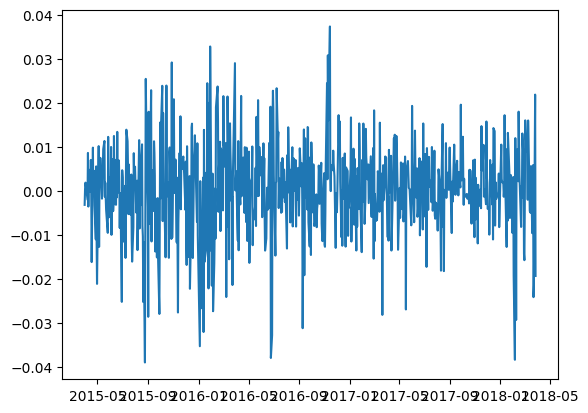

In [14]:
plt.plot(returns["IWM"])

In [15]:
SimpleRet_CDX_HY = df["CDX_North_America_HY"].pct_change() #Since the CDX_HY are already expressed in price terms, there's no need to compute them with the typical formula that implies the calculation of the Risk DV01
SimpleRet_CDX_HY = SimpleRet_CDX_HY[1:]

In [16]:
CDS_df = df[["CDX_North_America_IG","iTraxx_Europe_Main","iTraxx_Europe_Crossover"]] #CDX_North_America_HY has been excluded from this dataset (see previous comment)

#Then we compute the BPS difference and we define the function for the RISK DV01
diffBPS_df = []
for BPS in CDS_df:
    diffBPS_df.append(-(CDS_df[BPS] - (CDS_df[BPS].shift(1)))/10000)

diffBPS_df = pd.DataFrame(diffBPS_df).T
diffBPS_df = diffBPS_df[1:]
diffBPS_df

,CDX_North_America_IG,iTraxx_Europe_Main,iTraxx_Europe_Crossover
Date,,,
2015-03-31,0.00003,0.00004,0.00008
2015-04-01,0.00005,-0.00006,0.00022
2015-04-02,0.00005,-0.00008,-0.00007
2015-04-07,0.00024,0.00017,0.00060
2015-04-08,-0.00002,-0.00002,0.00020
...,...,...,...
2018-03-21,0.00012,0.00009,0.00030
2018-03-22,-0.00039,-0.00016,-0.00065
2018-03-23,-0.00032,-0.00015,-0.00035


In [17]:
pd.options.display.float_format = '{:.4}'.format
def riskDV01(s,r=0.04,m=5,R=0.4):
  s=s/10000 #We divide by 10000 because 1BPS = 0,01%, in this way by dividing by 10000 we omit the % sign
  h=s/(1-R)
  return (1-np.exp(-(r+h)*m))/(r+h)

riskDV01_df = []
riskDV01_df1 = []
riskDV01_df2 = []

for z in df["CDX_North_America_IG"]:
  riskDV01_df.append(riskDV01(z))
for x in df["iTraxx_Europe_Main"]:
  riskDV01_df1.append(riskDV01(x))
for y in df["iTraxx_Europe_Crossover"]:
  riskDV01_df2.append(riskDV01(y))

riskDV01_df = pd.DataFrame(riskDV01_df, columns=["CDX_North_America_IG"], index = df.index) #We create a dataframe from the first list, and then we add the other lists as columns of the dataframe.
riskDV01_df["iTraxx_Europe_Main"] = riskDV01_df1
riskDV01_df["iTraxx_Europe_Crossover"] = riskDV01_df2

riskDV01_df

,CDX_North_America_IG,iTraxx_Europe_Main,iTraxx_Europe_Crossover
Date,,,
2015-03-30,4.399,4.431,4.085
2015-03-31,4.4,4.431,4.086
2015-04-01,4.401,4.43,4.089
2015-04-02,4.401,4.429,4.088
2015-04-07,4.406,4.432,4.098
...,...,...,...
2018-03-21,4.421,4.428,4.054
2018-03-22,4.414,4.425,4.043
2018-03-23,4.408,4.422,4.038


In [18]:
pd.options.display.float_format = '{:.3%}'.format
MTM_CDS = pd.DataFrame(diffBPS_df["CDX_North_America_IG"]*riskDV01_df["CDX_North_America_IG"])
MTM_CDS["CDX_North_America_HY"] = SimpleRet_CDX_HY
MTM_CDS["iTraxx_Europe_Main"] = diffBPS_df["iTraxx_Europe_Main"]*riskDV01_df["iTraxx_Europe_Main"]
MTM_CDS["iTraxx_Europe_Crossover"] = diffBPS_df["iTraxx_Europe_Crossover"]*riskDV01_df["iTraxx_Europe_Crossover"]
MTM_CDS["SPY simple returns"] = returns["SPY"]

MTM_CDS = MTM_CDS[1:]
MTM_CDS

,CDX_North_America_IG,CDX_North_America_HY,iTraxx_Europe_Main,iTraxx_Europe_Crossover,SPY simple returns
Date,,,,,
2015-03-31,0.013%,0.087%,0.018%,0.033%,-0.874%
2015-04-01,0.022%,0.096%,-0.027%,0.090%,-0.354%
2015-04-02,0.022%,0.048%,-0.035%,-0.029%,0.360%
2015-04-07,0.106%,0.413%,0.075%,0.246%,0.407%
2015-04-08,-0.009%,-0.038%,-0.009%,0.082%,0.338%
...,...,...,...,...,...
2018-03-21,0.053%,0.141%,0.040%,0.122%,-0.192%
2018-03-22,-0.172%,-0.563%,-0.071%,-0.263%,-2.500%
2018-03-23,-0.141%,-0.501%,-0.066%,-0.141%,-2.131%


In [19]:
VAR_SPY = MTM_CDS["CDX_North_America_IG"].var()
COV_matrix = MTM_CDS.cov()
COV_matrix
beta = COV_matrix.loc["CDX_North_America_IG","SPY simple returns"] / VAR_SPY

print(f'The beta of the selected portfolio is {round(beta,2)}x')

The beta of the selected portfolio is 8.35x
